##Download Dataset

In [ ]:
#sometimes a download link doesn't work due to google drive limiting access, try another

#!gdown 1sA6TC55mqRZM3YYaFnhSZk6FSjNUa8nJ
#!gdown 1-4KC7AbkQkq6quh4mGsWmkidxPbkwGib
!gdown 1iJ95GwACxEiYubXrtbxZiwxKCATQ-eEb

!pip install -U segmentation-models

Downloading...
From: https://drive.google.com/uc?id=1iJ95GwACxEiYubXrtbxZiwxKCATQ-eEb
To: /content/ai4mars-dataset-merged-0.1.zip
  0% 0.00/6.14G [00:00<?, ?B/s]Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/response.py", line 444, in _error_catcher
    yield
  File "/usr/local/lib/python3.10/dist-packages/urllib3/response.py", line 567, in read
    data = self._fp_read(amt) if not fp_closed else b""
  File "/usr/local/lib/python3.10/dist-packages/urllib3/response.py", line 533, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
  File "/usr/lib/python3.10/http/client.py", line 466, in read
    s = self.fp.read(amt)
  File "/usr/lib/python3.10/socket.py", line 705, in readinto
    return self._sock.recv_into(b)
  File "/usr/lib/python3.10/ssl.py", line 1274, in recv_into
    return self.read(nbytes, buffer)
  File "/usr/lib/python3.10/ssl.py", line 1130, in read
    return self._sslobj.read(len, buffer)
Keyboard

In [ ]:
!unzip /content/ai4mars-dataset-merged-0.1.zip

Archive:  /content/ai4mars-dataset-merged-0.1.zip
replace info.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

##Process Dataset

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
from PIL import Image
from keras.utils import to_categorical
import cv2
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
import seaborn as sns


#if error importing segmentation_models, follow the error link:
#(click "/usr/local/lib/python3.10/dist-packages/efficientnet/__init__.py")
#to open _init_.py and replace the line
#"keras.utils.generic_utils.get_custom_objects().update(custom_objects)"
#with "keras.utils.get_custom_objects().update(custom_objects)"
#then save and restart runtime
import segmentation_models as sm

In [ ]:
images = "/content/msl/images"
tr_lab = "/content/msl/labels/train"
test_lab1 = "/content/msl/labels/test/masked-gold-min1-100agree"
test_lab2 = "/content/msl/labels/test/masked-gold-min2-100agree"
test_lab3 = "/content/msl/labels/test/masked-gold-min3-100agree"
edr = images + "/edr"
mxy = images + "/mxy" # not required
rng = images + "/rng-30m" # not required

In [ ]:
edr_files = os.listdir(edr)
trlab_files = os.listdir(tr_lab)
testlab1_files = os.listdir(test_lab1)
testlab2_files = os.listdir(test_lab2)
testlab3_files = os.listdir(test_lab3)

raw_train_X = []
raw_train_y = []
test_X1 = []
test_y1 = []
test_X2 = []
test_y2 = []
test_X3 = []
test_y3 = []
c = 0

# preparing raw_train_X and y
for lab_name in trlab_files:
    img_name = lab_name[:-4] + ".JPG"


    if img_name in edr_files:

        img_path = os.path.join(edr, img_name)
        img_arr = cv2.imread(img_path)
        img_arr = cv2.resize(img_arr, dsize = (224, 224))

        lab_path = os.path.join(tr_lab, lab_name)
        lab_arr = cv2.imread(lab_path, 0)
        lab_arr = cv2.resize(lab_arr, (224, 224), interpolation = cv2.INTER_NEAREST)

        raw_train_X.append(img_arr)
        raw_train_y.append(lab_arr)

    c += 1
    if c >= 1000:
        break

for lab_name in testlab1_files:
    img_name = lab_name[:-11] + ".JPG"

    if img_name in edr_files:

        img_path = os.path.join(edr, img_name)
        img_arr = cv2.imread(img_path)
        img_arr = cv2.resize(img_arr, dsize = (224, 224))

        lab_path = os.path.join(test_lab1, lab_name)
        lab_arr = cv2.imread(lab_path, 0)
        lab_arr = cv2.resize(lab_arr, (224, 224), interpolation = cv2.INTER_NEAREST)

        test_X1.append(img_arr)
        test_y1.append(lab_arr)

for lab_name in testlab2_files:
    img_name = lab_name[:-11] + ".JPG"

    if img_name in edr_files:

        img_path = os.path.join(edr, img_name)
        img_arr = cv2.imread(img_path)
        img_arr = cv2.resize(img_arr, dsize = (224, 224))

        lab_path = os.path.join(test_lab2, lab_name)
        lab_arr = cv2.imread(lab_path, 0)
        lab_arr = cv2.resize(lab_arr, (224, 224), interpolation = cv2.INTER_NEAREST)

        test_X2.append(img_arr)
        test_y2.append(lab_arr)


for lab_name in testlab3_files:
    img_name = lab_name[:-11] + ".JPG"

    if img_name in edr_files:

        img_path = os.path.join(edr, img_name)
        img_arr = cv2.imread(img_path)
        img_arr = cv2.resize(img_arr, dsize = (224, 224))

        lab_path = os.path.join(test_lab3, lab_name)
        lab_arr = cv2.imread(lab_path, 0)
        lab_arr = cv2.resize(lab_arr, (224, 224), interpolation = cv2.INTER_NEAREST)

        test_X3.append(img_arr)
        test_y3.append(lab_arr)



raw_train_X = np.asarray(raw_train_X, dtype = np.float32) / 255.0
raw_train_y = np.array(raw_train_y, dtype = np.uint8)
test_X1 = np.asarray(test_X1, dtype = np.float32) / 255.0
test_y1 = np.array(test_y1, dtype = np.uint8)
test_X2 = np.asarray(test_X2, dtype = np.float32) / 255.0
test_y2 = np.array(test_y2, dtype = np.uint8)
test_X3 = np.asarray(test_X3, dtype = np.float32) / 255.0
test_y3 = np.array(test_y3, dtype = np.uint8)

# 0 - soil
# 1 - bedrock
# 2 - sand
# 3 - big rock
# 255 -> 4 - NULL (no label)
labels = ['soil','bedrock','sand','big rock','NULL']

# keeping integer values in labels will help us in segmentation task (UNet)
raw_train_y[raw_train_y==255] = 4
test_y1[test_y1==255] = 4
test_y2[test_y2==255] = 4
test_y3[test_y3==255] = 4

example_y = raw_train_y

raw_train_y = to_categorical(raw_train_y, num_classes=5)


print(raw_train_X.shape, raw_train_y.shape, test_X1.shape, test_y1.shape, test_X2.shape, test_y2.shape, test_X3.shape, test_y3.shape)

(1000, 224, 224, 3) (1000, 224, 224, 5) (322, 224, 224, 3) (322, 224, 224) (322, 224, 224, 3) (322, 224, 224) (322, 224, 224, 3) (322, 224, 224)


##Image Example

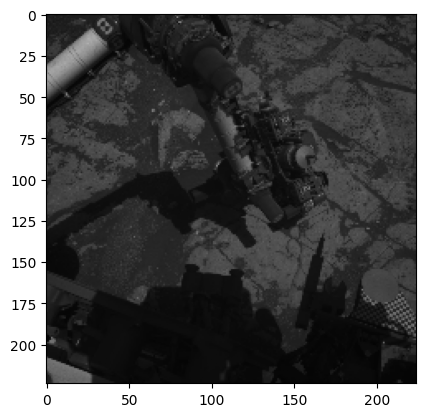

In [ ]:
plt.imshow(raw_train_X[150])

[0. 1.]


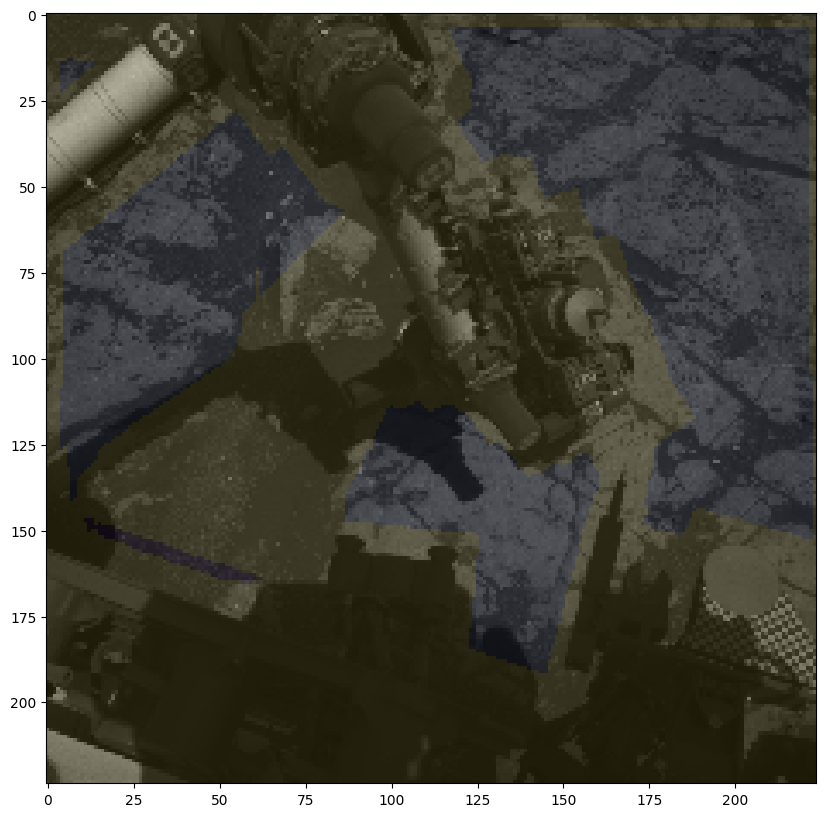

In [ ]:
print(np.unique(raw_train_y[150]))

plt.figure(figsize = (10, 10))

plt.imshow(raw_train_X[150])
plt.imshow(example_y[150], alpha = 0.1)

plt.show()

##My Models Using Keras

In [ ]:
from tensorflow import keras
from keras.layers import Conv2D, Dense, MaxPooling2D, Input, GlobalMaxPooling2D, Reshape, Flatten, Dropout, BatchNormalization
from keras.models import Sequential
from keras import datasets
from keras.layers.core import Dense, Activation
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

shape = (224, 224, 3)

# add layers
maxpool_layer = MaxPooling2D()
input = Input(shape)
layer1 = Conv2D(32,3,padding="same",activation="relu")
layer2 = Conv2D(32,3,padding="same",activation="relu")
layer3 = Conv2D(64,3,padding="same",activation="relu")
layer4 = Conv2D(64,3,padding="same",activation="relu")
layer5 = Conv2D(128,3,padding="same",activation="relu")
layer6 = Conv2D(128,3,padding="same",activation="relu")
layer7 = Conv2D(128,3,padding="same",activation="relu")
layer8 = Conv2D(128,3,padding="same",activation="relu")
layer9 = Dense(units=128,activation="relu")
layer10 = Dense(units=224*224*5,activation="softmax")

# First model with BatchNorm after every Conv2D layer and many Dropouts
model = Sequential([
    input,
    layer1,
    BatchNormalization(),
    layer2,
    BatchNormalization(),
    maxpool_layer,
    Dropout(0.2),
    layer3,
    BatchNormalization(),
    layer4,
    BatchNormalization(),
    maxpool_layer,
    Dropout(0.3),
    layer5,
    BatchNormalization(),
    layer6,
    BatchNormalization(),
    maxpool_layer,
    Dropout(0.3),
    layer7,
    BatchNormalization(),
    layer8,
    BatchNormalization(),
    maxpool_layer,
    Dropout(0.4),
    Flatten(),
    layer9,
    BatchNormalization(),
    Dropout(0.4),
    layer10,
    Reshape((224,224,5))
])

#Second model with less BatchNorm and one small Dropout at the end
layer11 = Conv2D(64,3,padding="same",activation="relu")
layer22 = Conv2D(64,3,padding="same",activation="relu")
layer33 = Conv2D(128,3,padding="same",activation="relu")
layer44 = Conv2D(128,3,padding="same",activation="relu")
layer55 = Conv2D(128,3,padding="same",activation="relu")
layer66 = Conv2D(128,3,padding="same",activation="relu")
layer77 = Dense(units=128,activation="relu")
layer88 = Dense(units=224*224*5,activation="softmax")

model3 = Sequential([
    input,
    layer11,
    BatchNormalization(),
    layer22,
    maxpool_layer,
    layer33,
    BatchNormalization(),
    layer44,
    maxpool_layer,
    layer55,
    BatchNormalization(),
    layer66,
    BatchNormalization(),
    maxpool_layer,
    Flatten(),
    layer77,
    Dropout(0.25),
    layer88,
    Reshape((224,224,5))
])

model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])
model3.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

###Running K fold validation on first model

In [ ]:
epochs= 35
batch_size=32
k = 5
total_acc1=0
total_val_acc1=0
total_loss1=0
total_val_loss1=0

# 5 fold validation
k_fold_val = KFold(n_splits=k, shuffle=True)

for i, (train_indices, val_indices) in enumerate(k_fold_val.split(raw_train_X)):
    model = Sequential([
        input,
        layer1,
        BatchNormalization(),
        layer2,
        BatchNormalization(),
        maxpool_layer,
        Dropout(0.2),
        layer3,
        BatchNormalization(),
        layer4,
        BatchNormalization(),
        maxpool_layer,
        Dropout(0.3),
        layer5,
        BatchNormalization(),
        layer6,
        BatchNormalization(),
        maxpool_layer,
        Dropout(0.3),
        layer7,
        BatchNormalization(),
        layer8,
        BatchNormalization(),
        maxpool_layer,
        Dropout(0.4),
        Flatten(),
        layer9,
        BatchNormalization(),
        Dropout(0.4),
        layer10,
        Reshape((224,224,5))
    ])
    model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])
    train_X = raw_train_X[train_indices]
    v_X = raw_train_X[val_indices]
    train_y = raw_train_y[train_indices]
    v_y = raw_train_y[val_indices]
    temp_hist= model.fit(train_X, train_y, epochs=epochs, batch_size=batch_size, validation_data=(v_X, v_y))

    total_acc1+=temp_hist.history["accuracy"][-1]
    total_val_acc1+=temp_hist.history["val_accuracy"][-1]
    total_loss1+=temp_hist.history["loss"][-1]
    total_val_loss1+=temp_hist.history["val_loss"][-1]

    print("\nNext fold:", i,"\n")

Epoch 1/35
25/25 [==============================] - 8s 82ms/step - loss: 1.5287 - accuracy: 0.4449 - val_loss: 1.6901 - val_accuracy: 0.3143
Epoch 2/35
25/25 [==============================] - 2s 60ms/step - loss: 1.3250 - accuracy: 0.5658 - val_loss: 3.0194 - val_accuracy: 0.2345
Epoch 3/35
25/25 [==============================] - 2s 65ms/step - loss: 1.1645 - accuracy: 0.6226 - val_loss: 3.1630 - val_accuracy: 0.1367
Epoch 4/35
25/25 [==============================] - 2s 62ms/step - loss: 1.0331 - accuracy: 0.6677 - val_loss: 3.6482 - val_accuracy: 0.0878
Epoch 5/35
25/25 [==============================] - 2s 62ms/step - loss: 0.9700 - accuracy: 0.6878 - val_loss: 5.1649 - val_accuracy: 0.0685
Epoch 6/35
25/25 [==============================] - 2s 61ms/step - loss: 0.8406 - accuracy: 0.7181 - val_loss: 5.3949 - val_accuracy: 0.0740
Epoch 7/35
25/25 [==============================] - 2s 61ms/step - loss: 0.7740 - accuracy: 0.7349 - val_loss: 9.0360 - val_accuracy: 0.1009
Epoch 8/35
25

####Average validation accuracy, train accuracy and loss

In [ ]:
print("For the first model\n")
print("Average of training accuracy: ",total_acc1/k)
print("Avergae of validation accuracy: ",total_val_acc1/k)
print("Avergae of loss: ",total_loss1/k)

For the first model

Average of training accuracy:  0.8990523099899292
Avergae of validation accuracy:  0.8615429043769837
Avergae of loss:  0.2675323307514191


###Running K fold validation on second model

In [ ]:
epochs= 35
batch_size=32
k = 5
total_acc3=0
total_val_acc3=0
total_loss3=0
total_val_loss3=0

# k fold validation
k_fold_val = KFold(n_splits=k, shuffle=True)

for i, (train_indices, val_indices) in enumerate(k_fold_val.split(raw_train_X)):
    model3 = Sequential([
        input,
        layer11,
        BatchNormalization(),
        layer22,
        maxpool_layer,
        layer33,
        BatchNormalization(),
        layer44,
        maxpool_layer,
        layer55,
        BatchNormalization(),
        layer66,
        BatchNormalization(),
        maxpool_layer,
        Flatten(),
        layer77,
        Dropout(0.25),
        layer88,
        Reshape((224,224,5))
    ])
    model3.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])
    train_X = raw_train_X[train_indices]
    v_X = raw_train_X[val_indices]
    train_y = raw_train_y[train_indices]
    v_y = raw_train_y[val_indices]
    temp_hist= model.fit(train_X, train_y, epochs=epochs, batch_size=batch_size, validation_data=(v_X, v_y))

    total_acc3+=temp_hist.history["accuracy"][-1]
    total_val_acc3+=temp_hist.history["val_accuracy"][-1]
    total_loss3+=temp_hist.history["loss"][-1]
    total_val_loss3+=temp_hist.history["val_loss"][-1]

    print("\nNext fold:", i,"\n")

Epoch 1/35
25/25 [==============================] - 2s 72ms/step - loss: 0.2472 - accuracy: 0.9067 - val_loss: 0.1287 - val_accuracy: 0.9539
Epoch 2/35
25/25 [==============================] - 2s 63ms/step - loss: 0.2380 - accuracy: 0.9106 - val_loss: 0.1546 - val_accuracy: 0.9443
Epoch 3/35
25/25 [==============================] - 2s 64ms/step - loss: 0.2381 - accuracy: 0.9104 - val_loss: 0.1317 - val_accuracy: 0.9509
Epoch 4/35
25/25 [==============================] - 2s 64ms/step - loss: 0.2342 - accuracy: 0.9109 - val_loss: 0.1371 - val_accuracy: 0.9498
Epoch 5/35
25/25 [==============================] - 2s 63ms/step - loss: 0.2305 - accuracy: 0.9125 - val_loss: 0.1390 - val_accuracy: 0.9488
Epoch 6/35
25/25 [==============================] - 2s 63ms/step - loss: 0.2418 - accuracy: 0.9089 - val_loss: 0.5642 - val_accuracy: 0.7808
Epoch 7/35
25/25 [==============================] - 2s 64ms/step - loss: 0.2392 - accuracy: 0.9093 - val_loss: 0.1431 - val_accuracy: 0.9469
Epoch 8/35
25

####Average validation accuracy, train accuracy and loss

In [ ]:
print("For the second model\n")
print("Average of training accuracy: ",total_acc3/k)
print("Avergae of validation accuracy: ",total_val_acc3/k)
print("Avergae of loss: ",total_loss3/k)

For the second model

Average of training accuracy:  0.9227412223815918
Avergae of validation accuracy:  0.9395116329193115
Avergae of loss:  0.20023282170295714


##Using a Pretrained Model

In [ ]:
# Reference

# @misc{Yakubovskiy:2019,
#   Author = {Pavel Iakubovskii},
#   Title = {Segmentation Models},
#   Year = {2019},
#   Publisher = {GitHub},
#   Journal = {GitHub repository},
#   Howpublished = {\url{https://github.com/qubvel/segmentation_models}}
# }

In [ ]:
BACKBONE = 'resnet50'
preprocess_input = sm.get_preprocessing(BACKBONE)
raw_train_X = preprocess_input(raw_train_X)

# model -> model2
model2 = sm.Unet(BACKBONE, classes=5,input_shape=(224, 224, 3),encoder_weights='imagenet')
model2.compile('Adam',loss="categorical_crossentropy",metrics=["accuracy"])

94592056/94592056 [==============================] - 5s 0us/step


In [ ]:
from sklearn.model_selection import KFold
epochs= 35
batch_size=32
k = 5
total_acc2=0
total_val_acc2=0
total_loss2=0
total_val_loss2=0

# k fold validation
k_fold_val = KFold(n_splits=k, shuffle=True)

for i, (train_indices, val_indices) in enumerate(k_fold_val.split(raw_train_X)):
    model2 = sm.Unet(BACKBONE, classes=5,input_shape=(224, 224, 3),encoder_weights='imagenet')
    model2.compile('Adam',loss="categorical_crossentropy",metrics=["accuracy"])
    train_X = raw_train_X[train_indices]
    v_X = raw_train_X[val_indices]
    train_y = raw_train_y[train_indices]
    v_y = raw_train_y[val_indices]
    v_X = preprocess_input(v_X)
    temp_hist= model2.fit(train_X, train_y, epochs=epochs, batch_size=batch_size, validation_data=(v_X, v_y))

    total_acc2+=temp_hist.history["accuracy"][-1]
    total_val_acc2+=temp_hist.history["val_accuracy"][-1]
    total_loss2+=temp_hist.history["loss"][-1]
    total_val_loss2+=temp_hist.history["val_loss"][-1]

    print("\nNext fold:", i,"\n")

Epoch 1/35
25/25 [==============================] - 41s 226ms/step - loss: 1.1165 - accuracy: 0.5868 - val_loss: 985515.5000 - val_accuracy: 0.4075
Epoch 2/35
25/25 [==============================] - 3s 116ms/step - loss: 0.7015 - accuracy: 0.7468 - val_loss: 72371.0078 - val_accuracy: 0.3859
Epoch 3/35
25/25 [==============================] - 3s 115ms/step - loss: 0.6086 - accuracy: 0.7881 - val_loss: 29.6849 - val_accuracy: 0.1846
Epoch 4/35
25/25 [==============================] - 3s 115ms/step - loss: 0.5766 - accuracy: 0.7873 - val_loss: 1.8430 - val_accuracy: 0.2130
Epoch 5/35
25/25 [==============================] - 3s 115ms/step - loss: 0.5558 - accuracy: 0.7963 - val_loss: 5.4824 - val_accuracy: 0.1809
Epoch 6/35
25/25 [==============================] - 3s 115ms/step - loss: 0.5278 - accuracy: 0.8043 - val_loss: 3.6029 - val_accuracy: 0.1893
Epoch 7/35
25/25 [==============================] - 3s 115ms/step - loss: 0.5096 - accuracy: 0.8090 - val_loss: 3.4147 - val_accuracy: 0.

####Average validation accuracy, train accuracy and loss

In [ ]:
print("For the pretrained model\n")
print("Average of training accuracy: ",total_acc2/k)
print("Avergae of validation accuracy: ",total_val_acc2/k)
print("Avergae of loss: ",total_loss2/k)

For the pretrained model

Average of training accuracy:  0.9390728354454041
Avergae of validation accuracy:  0.3032017707824707
Avergae of loss:  0.15632435083389282


#Training the best model between the 3

In [ ]:
print("For the first model\n")
print("Average of training accuracy: ",total_acc1/k)
print("Avergae of validation accuracy: ",total_val_acc1/k)
print("Avergae of loss: ",total_loss1/k)
print("________________________________________________________________\n")
print("For the second model\n")
print("Average of training accuracy: ",total_acc3/k)
print("Avergae of validation accuracy: ",total_val_acc3/k)
print("Avergae of loss: ",total_loss3/k)
print("________________________________________________________________\n")
print("For the pretrained model\n")
print("Average of training accuracy: ",total_acc2/k)
print("Avergae of validation accuracy: ",total_val_acc2/k)
print("Avergae of loss: ",total_loss2/k)

For the first model

Average of training accuracy:  0.8990523099899292
Avergae of validation accuracy:  0.8615429043769837
Avergae of loss:  0.2675323307514191
________________________________________________________________

For the second model

Average of training accuracy:  0.9227412223815918
Avergae of validation accuracy:  0.9395116329193115
Avergae of loss:  0.20023282170295714
________________________________________________________________

For the pretrained model

Average of training accuracy:  0.9390728354454041
Avergae of validation accuracy:  0.3032017707824707
Avergae of loss:  0.15632435083389282


The first and second model have high accuracy on both training and validation set, but the pretrained model has low validation accuracy, maybe because we need more epochs. To further compare between the first and second model, we'll take a look at an example of the prediction label versus the actual label.

###First model example

11/11 [==============================] - 0s 12ms/step
prediction


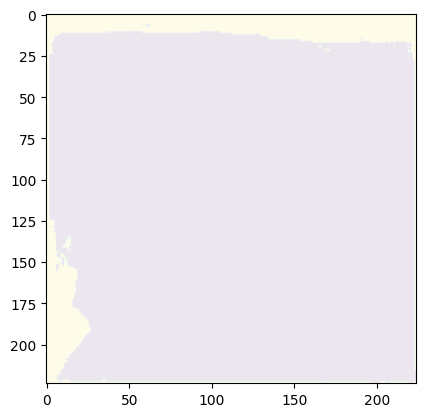

In [ ]:
# For first model
y_predicted = model.predict(test_X1)
y_predicted = np.argmax(y_predicted, axis=-1)
print("prediction")
plt.imshow(y_predicted[4], alpha = 0.1)

true label


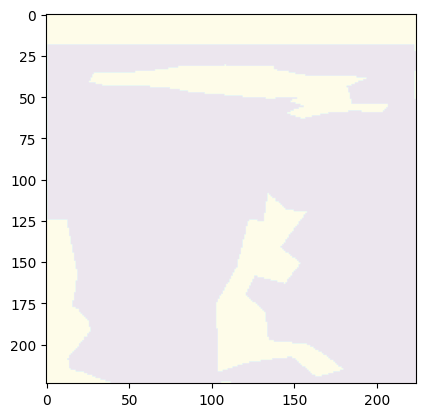

In [ ]:
print("true label")
plt.imshow(test_y1[4], alpha = 0.1)

###Second model example

11/11 [==============================] - 0s 16ms/step
prediction


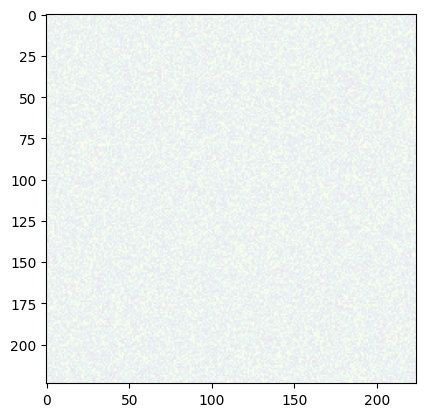

In [ ]:
# For second model
y_predicted = model3.predict(test_X1)
y_predicted = np.argmax(y_predicted, axis=-1)
print("prediction")
plt.imshow(y_predicted[4], alpha = 0.1)

true label


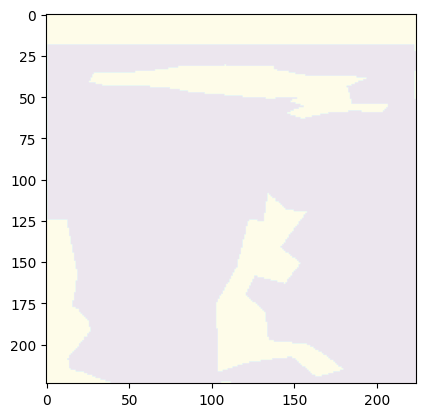

In [ ]:
print("true label")
plt.imshow(test_y1[4], alpha = 0.1)

#Choice of model

We can see that the second model doesn't make much sense as it predicts random pixels all over the place. The first model on the other hand isn't quite right but at least it makes more sense, so we'll choose the first model.

##Train With First Model

In [ ]:
shape = (224, 224, 3)

# add layers
maxpool_layer = MaxPooling2D()
input = Input(shape)
layer1 = Conv2D(32,3,padding="same",activation="relu")
layer2 = Conv2D(32,3,padding="same",activation="relu")
layer3 = Conv2D(64,3,padding="same",activation="relu")
layer4 = Conv2D(64,3,padding="same",activation="relu")
layer5 = Conv2D(128,3,padding="same",activation="relu")
layer6 = Conv2D(128,3,padding="same",activation="relu")
layer7 = Conv2D(128,3,padding="same",activation="relu")
layer8 = Conv2D(128,3,padding="same",activation="relu")
layer9 = Dense(units=128,activation="relu")
layer10 = Dense(units=224*224*5,activation="softmax")

# First model with BatchNorm after every Conv2D layer and many Dropouts
model = Sequential([
    input,
    layer1,
    BatchNormalization(),
    layer2,
    BatchNormalization(),
    maxpool_layer,
    Dropout(0.2),
    layer3,
    BatchNormalization(),
    layer4,
    BatchNormalization(),
    maxpool_layer,
    Dropout(0.3),
    layer5,
    BatchNormalization(),
    layer6,
    BatchNormalization(),
    maxpool_layer,
    Dropout(0.3),
    layer7,
    BatchNormalization(),
    layer8,
    BatchNormalization(),
    maxpool_layer,
    Dropout(0.4),
    Flatten(),
    layer9,
    BatchNormalization(),
    Dropout(0.4),
    layer10,
    Reshape((224,224,5))
])

model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

epochs = 100
batch_size = 32
model.fit(raw_train_X, raw_train_y, epochs=epochs, batch_size=batch_size)

Epoch 1/100
32/32 [==============================] - 8s 57ms/step - loss: 1.5138 - accuracy: 0.4322
Epoch 2/100
32/32 [==============================] - 2s 55ms/step - loss: 1.2896 - accuracy: 0.5704
Epoch 3/100
32/32 [==============================] - 2s 56ms/step - loss: 1.1313 - accuracy: 0.6278
Epoch 4/100
32/32 [==============================] - 2s 55ms/step - loss: 0.9566 - accuracy: 0.6884
Epoch 5/100
32/32 [==============================] - 2s 56ms/step - loss: 0.8670 - accuracy: 0.7080
Epoch 6/100
32/32 [==============================] - 2s 56ms/step - loss: 0.7712 - accuracy: 0.7303
Epoch 7/100
32/32 [==============================] - 2s 55ms/step - loss: 0.7327 - accuracy: 0.7377
Epoch 8/100
32/32 [==============================] - 2s 56ms/step - loss: 0.6670 - accuracy: 0.7558
Epoch 9/100
32/32 [==============================] - 2s 56ms/step - loss: 0.6243 - accuracy: 0.7716
Epoch 10/100
32/32 [==============================] - 2s 55ms/step - loss: 0.6071 - accuracy: 0.7710

#Loss and Accuracy of Model on 3 Tests



In [ ]:
eval_test_y1 = to_categorical(test_y1, num_classes=5)
eval_test_y2 = to_categorical(test_y2, num_classes=5)
eval_test_y3 = to_categorical(test_y3, num_classes=5)

loss1, acc1 = model.evaluate(test_X1, eval_test_y1)
print('loss 1:', loss1, '\naccuracy 1:', acc1)
print('\n\n')
loss2, acc2 = model.evaluate(test_X2, eval_test_y2)
print('loss 2:', loss2, '\naccuracy 2:', acc2)
print('\n\n')
loss3, acc3 = model.evaluate(test_X3, eval_test_y3)
print('loss 3:', loss3, '\naccuracy 3:', acc3)

11/11 [==============================] - 0s 21ms/step - loss: 0.8920 - accuracy: 0.7340
loss 1: 0.8920334577560425 
accuracy 1: 0.7340331673622131



11/11 [==============================] - 0s 20ms/step - loss: 0.8951 - accuracy: 0.7160
loss 2: 0.8950721025466919 
accuracy 2: 0.7160140872001648



11/11 [==============================] - 0s 21ms/step - loss: 1.0935 - accuracy: 0.6613
loss 3: 1.0935001373291016 
accuracy 3: 0.6612642407417297


#Out of curiosity, pretrained model on 100 epochs

In [ ]:
BACKBONE = 'resnet50'
preprocess_input = sm.get_preprocessing(BACKBONE)
raw_train_X = preprocess_input(raw_train_X)

# model -> model2
model2 = sm.Unet(BACKBONE, classes=5,input_shape=(224, 224, 3),encoder_weights='imagenet')
model2.compile('Adam',loss="categorical_crossentropy",metrics=["accuracy"])

epochs= 100
batch_size=32

model2.fit(raw_train_X, raw_train_y, epochs=epochs, batch_size=batch_size)

Epoch 1/100
32/32 [==============================] - 38s 147ms/step - loss: 0.9372 - accuracy: 0.6686
Epoch 2/100
32/32 [==============================] - 3s 104ms/step - loss: 0.6509 - accuracy: 0.7591
Epoch 3/100
32/32 [==============================] - 3s 103ms/step - loss: 0.5888 - accuracy: 0.7792
Epoch 4/100
32/32 [==============================] - 3s 102ms/step - loss: 0.5317 - accuracy: 0.8041
Epoch 5/100
32/32 [==============================] - 3s 103ms/step - loss: 0.5194 - accuracy: 0.8017
Epoch 6/100
32/32 [==============================] - 3s 103ms/step - loss: 0.4749 - accuracy: 0.8198
Epoch 7/100
32/32 [==============================] - 3s 103ms/step - loss: 0.4718 - accuracy: 0.8177
Epoch 8/100
32/32 [==============================] - 3s 102ms/step - loss: 0.4264 - accuracy: 0.8349
Epoch 9/100
32/32 [==============================] - 3s 103ms/step - loss: 0.5092 - accuracy: 0.8064
Epoch 10/100
32/32 [==============================] - 3s 103ms/step - loss: 0.4624 - accur

In [ ]:
# test_y1 = to_categorical(test_y1, num_classes=5)
# test_y2 = to_categorical(test_y2, num_classes=5)
# test_y3 = to_categorical(test_y3, num_classes=5)

loss1, acc1 = model2.evaluate(test_X1, eval_test_y1)
print('loss 1:', loss1, '\naccuracy 1:', acc1)
print('\n\n')
loss2, acc2 = model2.evaluate(test_X2, eval_test_y2)
print('loss 2:', loss2, '\naccuracy 2:', acc2)
print('\n\n')
loss3, acc3 = model2.evaluate(test_X3, eval_test_y3)
print('loss 3:', loss3, '\naccuracy 3:', acc3)

11/11 [==============================] - 0s 34ms/step - loss: 0.7402 - accuracy: 0.7983
loss 1: 0.7401607632637024 
accuracy 1: 0.7983376383781433



11/11 [==============================] - 0s 33ms/step - loss: 0.6791 - accuracy: 0.7919
loss 2: 0.6790770292282104 
accuracy 2: 0.7918866872787476



11/11 [==============================] - 0s 33ms/step - loss: 0.9222 - accuracy: 0.7285
loss 3: 0.9222495555877686 
accuracy 3: 0.728481650352478


#Confusion Matrix

##Confusion Matrix of My Model 1

###First Test Set

In [ ]:
y_predicted = model.predict(test_X1)
test_y1 = test_y1.flatten()
test_y1 = test_y1.flatten()

y_predicted = np.argmax(y_predicted, axis=-1)
y_predicted = y_predicted.flatten()
y_predicted = y_predicted.flatten()

conf_matr = confusion_matrix(test_y1, y_predicted, labels=[0,1,2,3,4])

11/11 [==============================] - 0s 13ms/step


Text(0.5, 23.52222222222222, 'Predictions')

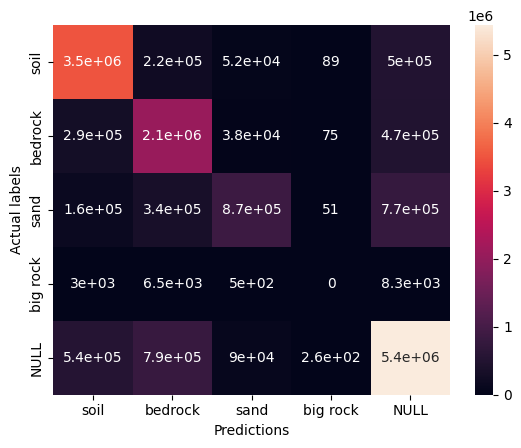

In [ ]:
plt.figure()
sns.heatmap(pd.DataFrame(conf_matr.tolist(),columns = labels, index = labels), annot = True)
plt.ylabel("Actual labels")
plt.xlabel("Predictions")

###Second Test Set

In [ ]:
y_predicted = model.predict(test_X2)
test_y2 = test_y2.flatten()
test_y2 = test_y2.flatten()

y_predicted = np.argmax(y_predicted, axis=-1)
y_predicted = y_predicted.flatten()
y_predicted = y_predicted.flatten()

conf_matr = confusion_matrix(test_y2, y_predicted, labels=[0,1,2,3,4])

11/11 [==============================] - 0s 13ms/step


Text(0.5, 23.52222222222222, 'Predictions')

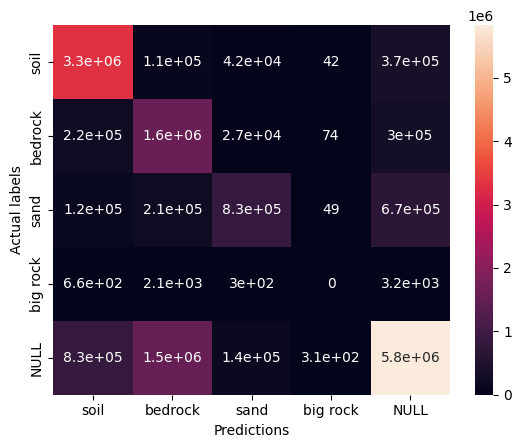

In [ ]:
plt.figure()
sns.heatmap(pd.DataFrame(conf_matr.tolist(),columns = labels, index = labels), annot = True)
plt.ylabel("Actual labels")
plt.xlabel("Predictions")

###Third Test Set

In [ ]:
y_predicted = model.predict(test_X3)
test_y3 = test_y3.flatten()
test_y3 = test_y3.flatten()

y_predicted = np.argmax(y_predicted, axis=-1)
y_predicted = y_predicted.flatten()
y_predicted = y_predicted.flatten()

conf_matr = confusion_matrix(test_y3, y_predicted, labels=[0,1,2,3,4])

11/11 [==============================] - 0s 12ms/step


Text(0.5, 23.52222222222222, 'Predictions')

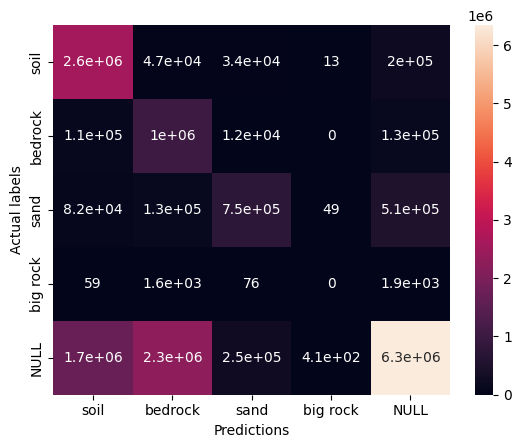

In [ ]:
plt.figure()
sns.heatmap(pd.DataFrame(conf_matr.tolist(),columns = labels, index = labels), annot = True)
plt.ylabel("Actual labels")
plt.xlabel("Predictions")

##Confusion matrix for pretrained model

###First Test Set

In [ ]:
y_predicted = model2.predict(test_X1)
# test_y1 = test_y1.flatten()
# test_y1 = test_y1.flatten()

y_predicted = np.argmax(y_predicted, axis=-1)
y_predicted = y_predicted.flatten()
y_predicted = y_predicted.flatten()

conf_matr = confusion_matrix(test_y1, y_predicted, labels=[0,1,2,3,4])

11/11 [==============================] - 1s 26ms/step


Text(0.5, 23.52222222222222, 'Predictions')

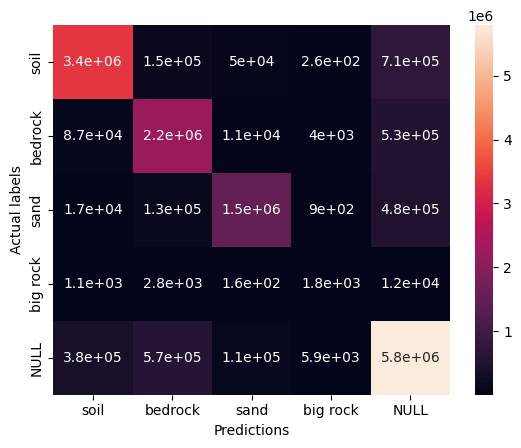

In [ ]:
plt.figure()
sns.heatmap(pd.DataFrame(conf_matr.tolist(),columns = labels, index = labels), annot = True)
plt.ylabel("Actual labels")
plt.xlabel("Predictions")

###Second Test Set

In [ ]:
y_predicted = model2.predict(test_X2)
# test_y2 = test_y2.flatten()
# test_y2 = test_y2.flatten()

y_predicted = np.argmax(y_predicted, axis=-1)
y_predicted = y_predicted.flatten()
y_predicted = y_predicted.flatten()

conf_matr = confusion_matrix(test_y2, y_predicted, labels=[0,1,2,3,4])

11/11 [==============================] - 0s 26ms/step


Text(0.5, 23.52222222222222, 'Predictions')

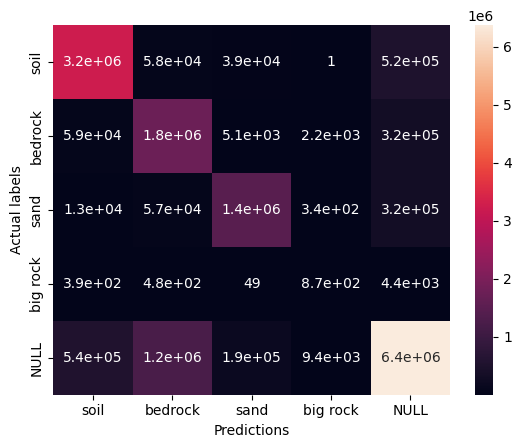

In [ ]:
plt.figure()
sns.heatmap(pd.DataFrame(conf_matr.tolist(),columns = labels, index = labels), annot = True)
plt.ylabel("Actual labels")
plt.xlabel("Predictions")

### Third Test Set

In [ ]:
y_predicted = model2.predict(test_X3)
# test_y3 = test_y3.flatten()
# test_y3 = test_y3.flatten()

y_predicted = np.argmax(y_predicted, axis=-1)
y_predicted = y_predicted.flatten()
y_predicted = y_predicted.flatten()

conf_matr = confusion_matrix(test_y3, y_predicted, labels=[0,1,2,3,4])

11/11 [==============================] - 0s 25ms/step


Text(0.5, 23.52222222222222, 'Predictions')

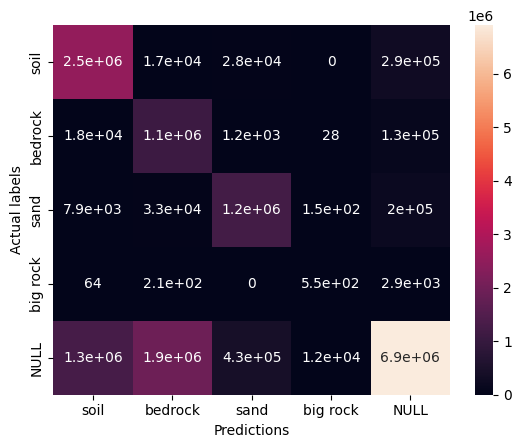

In [ ]:
plt.figure()
sns.heatmap(pd.DataFrame(conf_matr.tolist(),columns = labels, index = labels), annot = True)
plt.ylabel("Actual labels")
plt.xlabel("Predictions")